<a href="https://colab.research.google.com/github/webabdullah/DS_SESSION/blob/main/Case1_UAS_Telco_anlsysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
data.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [4]:
data.isnull().sum().values.sum()

0

In [5]:
# Replace the DSL digital network and fiber optic fiber network in InternetService with Yes
# Replace No phoneservice in MultipleLines with No
replace_list=['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
for i in replace_list:
    data[i]=data[i].str.replace('No internet service','No')
data['InternetService']=data['InternetService'].str.replace('Fiber optic','Yes')
data['InternetService']=data['InternetService'].str.replace('DSL','Yes')
data['MultipleLines']=data['MultipleLines'].str.replace('No phone service','No')
# SeniorCitizen 1 is changed to Yes, 0 is changed to No
data.SeniorCitizen=data.SeniorCitizen.replace({0:'No',1:'Yes'})
# Change Yes in Churn to non-churn customers and No to churn customers
data.Churn=data.Churn.replace({'No':'Non-churning customers','Yes':'Lost customers'})
# Convert TotalCharges to digital
data.TotalCharges=pd.to_numeric(data.TotalCharges,errors="coerce") #.to_numeric() converts the parameter to a numeric type, where coerce means invalid parsing will be set to NaN
data.TotalCharges.dtypes

dtype('float64')

In [6]:
# Online time grouping/box operation
bins_t=[0,6,12,18,24,30,36,42,48,54,60,66,72]
level_t=['0.5 years','1 year', '1.5 years', '2 years', '2.5 years', '3 years', '3.5 years', '4 years', '4.5 years','5 years','5.5 years','6 years']
data['tenure_group']=pd.cut(data.tenure,bins=bins_t,labels=level_t,right=True)
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,No,Yes,No,1,No,No,Yes,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,Non-churning customers,0.5 years
1,5575-GNVDE,Male,No,No,No,34,Yes,No,Yes,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,Non-churning customers,3 years
2,3668-QPYBK,Male,No,No,No,2,Yes,No,Yes,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Lost customers,0.5 years
3,7795-CFOCW,Male,No,No,No,45,No,No,Yes,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,Non-churning customers,4 years
4,9237-HQITU,Female,No,No,No,2,Yes,No,Yes,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Lost customers,0.5 years


In [7]:
bins_M=[0,20,40,60,80,100,120]
level_M=['20','40','60','80','100','120']
data['MonthlyCharges_group']=pd.cut(data.MonthlyCharges,bins=bins_M,labels=level_M,right=True)
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,MonthlyCharges_group
0,7590-VHVEG,Female,No,Yes,No,1,No,No,Yes,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,Non-churning customers,0.5 years,40
1,5575-GNVDE,Male,No,No,No,34,Yes,No,Yes,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,Non-churning customers,3 years,60
2,3668-QPYBK,Male,No,No,No,2,Yes,No,Yes,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Lost customers,0.5 years,60
3,7795-CFOCW,Male,No,No,No,45,No,No,Yes,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,Non-churning customers,4 years,60
4,9237-HQITU,Female,No,No,No,2,Yes,No,Yes,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Lost customers,0.5 years,80


In [9]:
data.dropna(inplace=True) #Not many missing values, delete
data.isnull().sum()

customerID              0
gender                  0
SeniorCitizen           0
Partner                 0
Dependents              0
tenure                  0
PhoneService            0
MultipleLines           0
InternetService         0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
Contract                0
PaperlessBilling        0
PaymentMethod           0
MonthlyCharges          0
TotalCharges            0
Churn                   0
tenure_group            0
MonthlyCharges_group    0
dtype: int64

In [10]:
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data_Churn=data[data['Churn']=='Lost customers']
Rate_Churn=data[data['Churn']=='Lost customers'].shape[0]/data['Churn'].shape[0]
print('Calculated, the overall churn rate = {:.2%}'.format(Rate_Churn))

Calculated, the overall churn rate = 26.58%


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


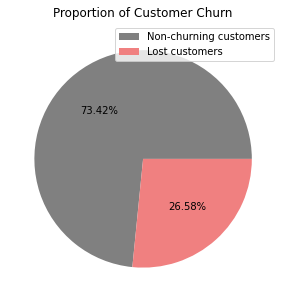

In [11]:
plt.rcParams['font.sans-serif']=['SimHei'] #Used to display Chinese labels normally
plt.rcParams['axes.unicode_minus']=False #Used to display the negative sign normally
%matplotlib inline
fig=plt.figure(num=1,figsize=(5,5))
plt.pie(data['Churn'].value_counts(),autopct="%.2f%%",colors=['grey','lightcoral'])
plt.title('Proportion of Customer Churn')
plt.legend(labels=['Non-churning customers','Lost customers'],loc='best')

In [ ]:
data.shape

(7043, 21)

In [ ]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
data[data['TotalCharges'].isin([' '])]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
import seaborn as sns

In [ ]:
import numpy as np

In [ ]:
data.replace(to_replace=r'^\s*$',value=np.nan,regex=True,inplace=True)

In [ ]:
data.dropna(axis=0, how='any', inplace=True)

In [ ]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

In [ ]:
data.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032,7032,7032.000000,7032,7032,7032.000000,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032.000000,7032.000000,7032
unique,7032,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2
top,8150-QUDFX,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3549,NaN,3639,4933,NaN,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,NaN,NaN,5163
mean,NaN,NaN,0.162400,NaN,NaN,32.421786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.798208,2283.300441,NaN
std,NaN,NaN,0.368844,NaN,NaN,24.545260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.085974,2266.771362,NaN
min,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.587500,401.450000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.862500,3794.737500,NaN


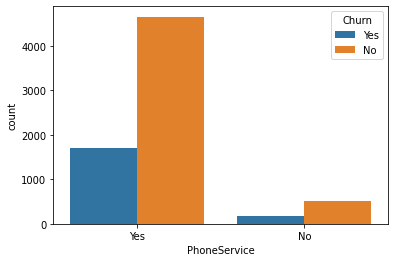

In [ ]:
sns.countplot(x='PhoneService',hue='Churn',data=data,order=['Yes','No'],hue_order=['Yes','No'])

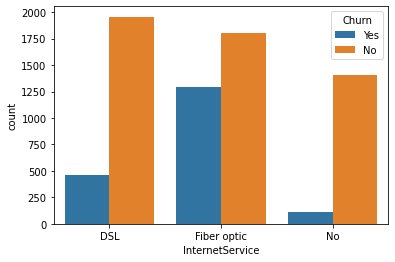

In [ ]:
sns.countplot(x='InternetService',hue='Churn',data=data,hue_order=['Yes','No'],order=['DSL','Fiber optic','No'])

In [ ]:
import matplotlib.pyplot as plt 

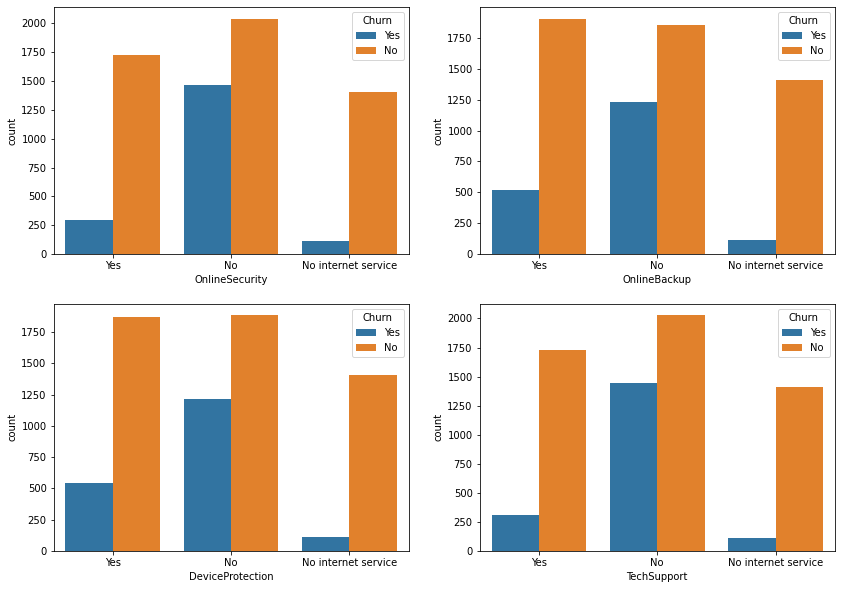

In [ ]:
fig,axes = plt.subplots(2,2,figsize=(14,10))
sns.countplot(x='OnlineSecurity',hue='Churn',data=data,hue_order=['Yes','No'],order=['Yes','No','No internet service'],ax=axes[0,0])
sns.countplot(x='OnlineBackup',hue='Churn',data=data,hue_order=['Yes','No'],order=['Yes','No','No internet service'],ax=axes[0,1])
sns.countplot(x='DeviceProtection',hue='Churn',data=data,hue_order=['Yes','No'],order=['Yes','No','No internet service'],ax=axes[1,0])
sns.countplot(x='TechSupport',hue='Churn',data=data,hue_order=['Yes','No'],order=['Yes','No','No internet service'],ax=axes[1,1])



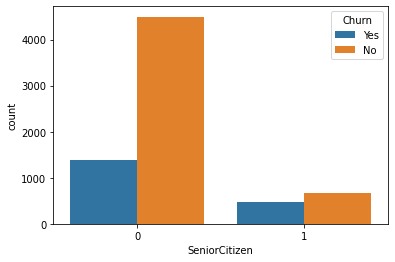

In [ ]:
sns.countplot(x='SeniorCitizen',hue='Churn',data=data,order=[0,1],hue_order=['Yes','No'])

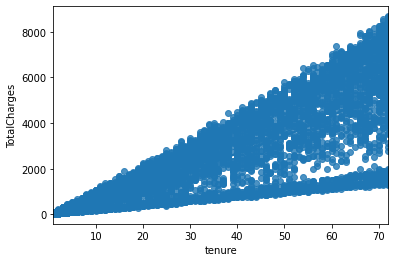

In [ ]:
sns.regplot(x='tenure',y='TotalCharges',order=4,data=data)

In [ ]:
corr=data[['tenure','TotalCharges']].corr()

In [ ]:
corr

,tenure,TotalCharges
tenure,1.00000,0.82588
TotalCharges,0.82588,1.00000


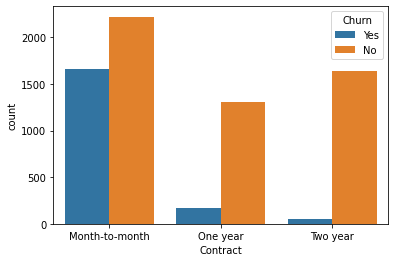

In [ ]:
sns.countplot(x='Contract',hue='Churn',data=data,hue_order=['Yes','No'],order=['Month-to-month','One year','Two year'])

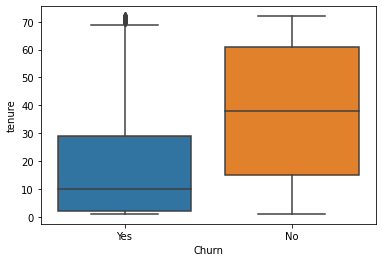

In [ ]:
sns.boxplot(x='Churn', y='tenure', data=data,order=['Yes','No'])

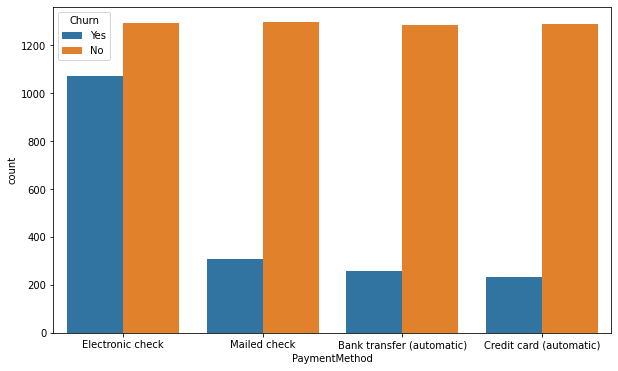

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod',hue='Churn',data=data,hue_order=['Yes','No'],order=['Electronic check','Mailed check','Bank transfer (automatic)','Credit card (automatic)'])

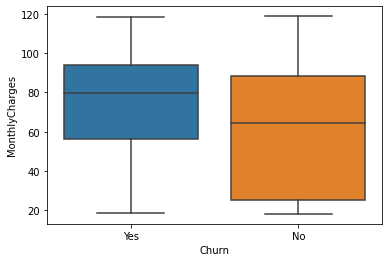

In [ ]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=data,order=['Yes','No'])